In [1]:
import numpy as np

import matplotlib.pyplot as plt
%matplotlib inline

plt.rc('font', size=12)
plt.rc('axes', labelsize=12)

In [2]:
%load_ext autoreload
%autoreload 2

In [3]:
import gglngram as gn
import sqlite3 as sq

In [4]:
databasePath = 'database-m.sqlite'

In [5]:
dbconnection = sq.connect(databasePath)
cursor = dbconnection.cursor()

In [7]:
# Get sorted ngrams  by total counts
getTopNgram = """SELECT * from countbulk
                      ORDER BY matchcount DESC"""

cursor.execute( getTopNgram )

rows = cursor.fetchall()
for row in rows[:10]:
    print(row)
    
print(len(rows))

('mais', 510584326, 'mais,mais_ADV,Mais,MAis_CONJ,Mais_ADV,MAis,MAIS,MaIS,mais_CONJ,maIs,mais_,MaIS_CONJ,maiS,MAiS_CONJ,MaiS,MAiS,MaIs_CONJ,MAIS_CONJ,MAIs_CONJ,maIs_CONJ,MAIs,Mais_,Mais_CONJ,maiS_CONJ,MaiS_CONJ,MAIS_ADV,MaIs')
('même', 442062368, 'même_ADJ,MÊme,Même,MÊME_ADJ,mÊme,Même_ADV,mÊme_ADV,même_,mêmE,MÊME,MÊMe,Même_ADJ,mÊme_ADJ,même_ADV,MÊME_ADV,même,mêMe,MÊme_ADV,MÊMe_ADJ')
('m.', 279451451, 'm._NOUN,M._NOUN,M._,m.,M.')
('moins', 165077053, 'MOiNS,Moins_ADV,moinS_ADV,MOINS_ADV,moins_,moins_ADV,MOINS,mOins,moIns,moinS,moIns_ADV,moins,mOins_ADV,Moins_NOUN,moins_NOUN,Moins,MOiNS_ADV,MOINS_NOUN')
('me', 127202412, 'me_NOUN,Me_PRON,me_PRON,me,Me_NOUN,mE_NOUN,ME,mE,ME_NOUN,Me,me_,ME_PRON,mE_PRON')
('monde', 84404441, 'mOnde,MoNDE,monde_,MONDE_NOUN,mONDE,mOnde_NOUN,MoNDE_NOUN,MONdE,Monde,MONDE,Monde_NOUN,MONdE_NOUN,monde,mONDE_NOUN,monde_NOUN')
('mon', 79051155, 'moN_DET,mON_DET,mOn,MON,moN,mON,MON_DET,Mon,mon,mon_,mon_DET,MOn,MOn_DET,mOn_DET,MoN_DET,MoN,Mon_DET')
('moment', 61008270

In [35]:
import random

sample_rows = rows[:50000]
random.shuffle(sample_rows)

sample_rows = rows[:5000]

In [36]:
def getGlobs( years, counts ):
    return counts.max(), counts.min(), counts.mean(), counts.std()

In [37]:
stats = {}
for ng, c, ngs in sample_rows:
    stats[ng] = getGlobs( *gn.getCountPerYear( cursor, ng, k=3 ) )

In [38]:
gMax, gMin, gMean, gStd = list( zip( *stats.values() ) )

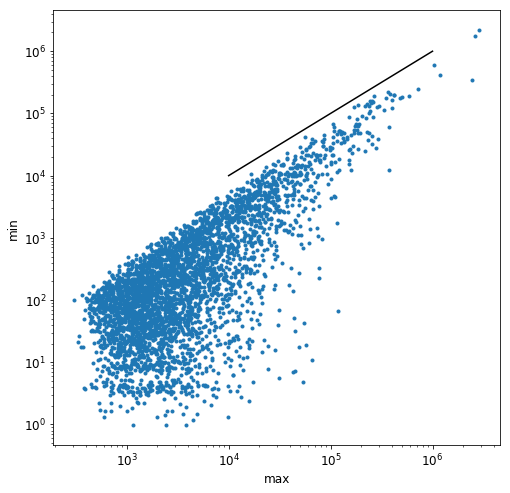

In [39]:
plt.figure( figsize=(8, 8) )
plt.loglog(gMax, gMin, '.')
plt.xlabel('max');plt.ylabel('min');
plt.loglog( [1e4, 1e6], [1e4, 1e6] , 'k')

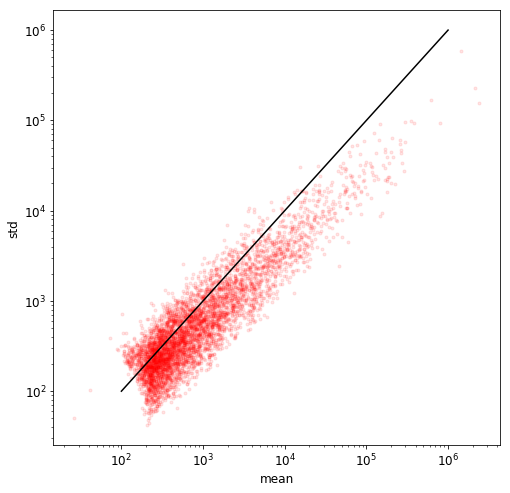

In [44]:
plt.figure( figsize=(8, 8) )
plt.loglog(gMean, gStd, '.r', alpha=0.1)
plt.xlabel('mean');plt.ylabel('std');
plt.loglog( [1e2, 1e6], [1e2, 1e6] , 'k');

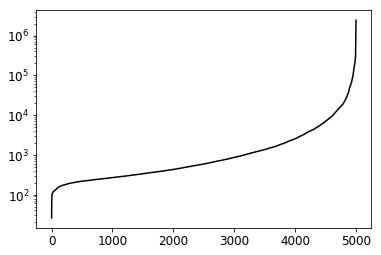

In [48]:
plt.semilogy( sorted(gMean), '-k', alpha=1)

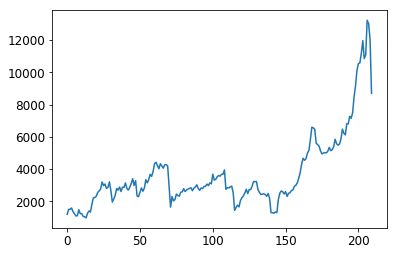

In [50]:
plt.plot( gn.total_volume_count )